In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings("ignore")
print('current directory: ', os.getcwd())
%matplotlib inline 

current directory:  /Users/kevin/Desktop/AI_hw2


In [2]:
import pickle

datapath = '/Users/kevin/Desktop/AI_hw2/dataset/train_set.pkl'

with open(datapath, "rb") as file:
    df = pickle.load(file)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54355 entries, 0 to 153527
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   waferMap        54355 non-null  object 
 1   dieSize         54355 non-null  float64
 2   lotName         54355 non-null  object 
 3   waferIndex      54355 non-null  float64
 4   trianTestLabel  54355 non-null  int64  
 5   failureType     54355 non-null  object 
 6   wafer_size      54355 non-null  object 
 7   failureNum      54355 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.7+ MB


In [3]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,wafer_size,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,0,none,"(45, 48)",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,0,none,"(45, 48)",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,0,none,"(45, 48)",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,0,none,"(45, 48)",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,0,none,"(45, 48)",8


In [4]:
def convert_image_size(img):
    dim_x = img.shape[0]
    dim_y = img.shape[1]
    return dim_x, dim_y

df['wafer_size'] = df['waferMap'].apply(convert_image_size)
print(df['wafer_size'].nunique())
print(df['wafer_size'].max(), df['wafer_size'].min())
df.head(2)

335
(212, 84) (15, 3)


,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,wafer_size,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,0,none,"(45, 48)",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,0,none,"(45, 48)",8


In [5]:
 df.wafer_size.value_counts()

(25, 27)    15684
(27, 25)     9235
(26, 26)     6369
(38, 36)     1877
(33, 37)     1804
            ...  
(38, 45)        1
(56, 63)        1
(75, 77)        1
(92, 91)        1
(59, 55)        1
Name: wafer_size, Length: 335, dtype: int64

In [6]:
import matplotlib.pyplot as plt
img = df.waferMap[0]
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

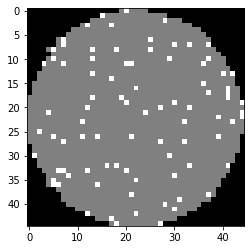

In [7]:
import cv2
IMG_SIZE = 45

def resize_img(wafer_map):
    return cv2.resize(wafer_map, (IMG_SIZE, IMG_SIZE))


df['waferMap_NORM'] = df['waferMap'].apply(resize_img)

img = df.waferMap_NORM[0]
plt.imshow(img, cmap="gray")
plt.show

In [8]:
df = df.sort_values(by = 'wafer_size')
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,wafer_size,failureNum,waferMap_NORM
109448,"[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",3.0,lot44867,20.0,0,none,"(15, 3)",8,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10894,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",572.0,lot10693,10.0,0,Edge-Loc,"(22, 35)",2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
9630,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",572.0,lot7433,2.0,0,Center,"(22, 35)",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
20786,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot17771,9.0,0,Edge-Loc,"(22, 50)",2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
21631,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot19803,15.0,0,Edge-Loc,"(22, 50)",2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...
12696,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot13461,17.0,0,Center,"(212, 84)",0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10870,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot10528,6.0,0,Scratch,"(212, 84)",6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
10421,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot9439,1.0,0,Loc,"(212, 84)",4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
12697,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot13479,8.0,0,Scratch,"(212, 84)",6,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


<function matplotlib.pyplot.show(close=None, block=None)>

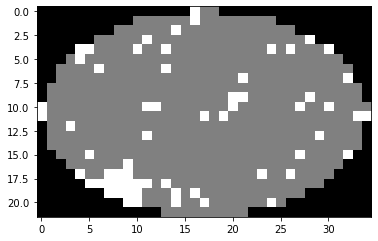

In [9]:

IMG = df.waferMap[10894]
plt.imshow(IMG, cmap="gray")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

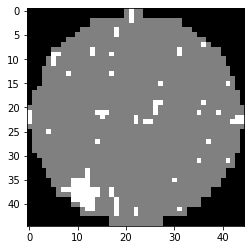

In [10]:
IMG = df.waferMap_NORM[10894]
plt.imshow(IMG, cmap="gray")
plt.show

In [11]:
%%time
#scale the image
import tensorflow as tf

def scaling(wafer_map):
    return tf.keras.utils.normalize(wafer_map)

df['waferMap_NORM'] = df['waferMap_NORM'].apply(scaling)

CPU times: user 5.42 s, sys: 640 ms, total: 6.06 s
Wall time: 7.02 s


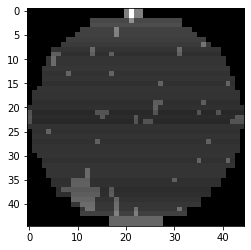

In [12]:
IMG = df.waferMap_NORM[10894]
plt.imshow(IMG, cmap="gray")

In [13]:
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,wafer_size,failureNum,waferMap_NORM
109448,"[[0, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",3.0,lot44867,20.0,0,none,"(15, 3)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10894,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",572.0,lot10693,10.0,0,Edge-Loc,"(22, 35)",2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9630,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",572.0,lot7433,2.0,0,Center,"(22, 35)",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
20786,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot17771,9.0,0,Edge-Loc,"(22, 50)",2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
21631,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",822.0,lot19803,15.0,0,Edge-Loc,"(22, 50)",2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
12696,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot13461,17.0,0,Center,"(212, 84)",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10870,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot10528,6.0,0,Scratch,"(212, 84)",6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10421,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot9439,1.0,0,Loc,"(212, 84)",4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
12697,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",14116.0,lot13479,8.0,0,Scratch,"(212, 84)",6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [14]:
from sklearn.utils import shuffle

#random shuffle the df
df = shuffle(df)
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType,wafer_size,failureNum,waferMap_NORM
12392,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3036.0,lot12768,10.0,0,Edge-Ring,"(63, 62)",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
68125,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,...",516.0,lot42992,4.0,0,none,"(25, 27)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
146971,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,...",953.0,lot46454,6.0,0,none,"(33, 37)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
21677,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",12662.0,lot19839,22.0,0,Edge-Ring,"(107, 150)",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
18192,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3027.0,lot15624,21.0,0,none,"(62, 62)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
1714,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,...",533.0,lot81,7.0,0,none,"(26, 26)",8,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
19597,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",10173.0,lot16420,20.0,0,Edge-Ring,"(133, 97)",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
14222,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1999.0,lot15009,2.0,0,Edge-Ring,"(48, 52)",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
12087,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",3036.0,lot12751,17.0,0,Edge-Ring,"(63, 62)",3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [16]:
df = df.reset_index(drop=True)
X = df.waferMap_NORM

X_fix = []
for img in X:
    X_fix.append(img)
X_fix = np.array(X_fix)

y = np.array(df.failureNum)

out = open('x.pickle', 'wb')
pickle.dump(X_fix, out)
out.close()

out = open('y.pickle', 'wb')
pickle.dump(y, out)
out.close()

## preprocessing for testing

In [1]:
import pickle

datapath = '/Users/kevin/Desktop/AI_hw2/dataset/test_set_all.pkl'

with open(datapath, "rb") as file:
    df_test = pickle.load(file)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118595 entries, 0 to 118594
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        118595 non-null  object 
 1   dieSize         118595 non-null  float64
 2   lotName         118595 non-null  object 
 3   waferIndex      118595 non-null  float64
 4   trianTestLabel  118595 non-null  int64  
 5   wafer_size      118595 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.4+ MB


<function matplotlib.pyplot.show(close=None, block=None)>

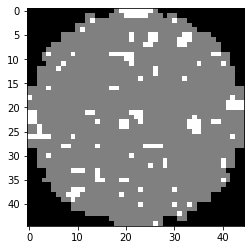

In [4]:
import cv2
IMG_SIZE = 45

def resize_img(wafer_map):
    return cv2.resize(wafer_map, (IMG_SIZE, IMG_SIZE))


df_test['waferMap_NORM'] = df_test['waferMap'].apply(resize_img)

img = df_test.waferMap_NORM[0]
plt.imshow(img, cmap="gray")
plt.show

CPU times: user 6.86 s, sys: 811 ms, total: 7.68 s
Wall time: 8.58 s


<function matplotlib.pyplot.show(close=None, block=None)>

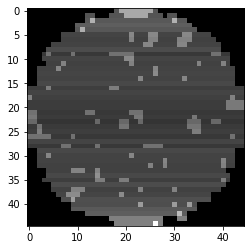

In [6]:
%%time
#scale the image
import tensorflow as tf

def scaling(wafer_map):
    return tf.keras.utils.normalize(wafer_map)

df_test['waferMap_NORM'] = df_test['waferMap_NORM'].apply(scaling)

img = df_test.waferMap_NORM[0]
plt.imshow(img, cmap="gray")
plt.show

In [7]:
X = df_test.waferMap_NORM

X_fix = []
for img in X:
    X_fix.append(img)
X_fix = np.array(X_fix)

out = open('x_test.pickle', 'wb')
pickle.dump(X_fix, out)
out.close()

In [8]:
X_fix

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.